# Homework 5 Code

In [ ]:
# Add import statements here
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import mode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

In [ ]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [ ]:
# To access files in your Google Drive, run this block and follow the instructions
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# To test if the above block worked, run this block
!ls '/content/gdrive/My Drive/'

 CEACAA007UZY38.PDF		      'PW PRESENTATION.gslides'
'Chapter 1. Arrays and Strings.gdoc'  'Python for Finance.gdoc'
 cleveland_test.csv		      'Q&A.docx'
 cleveland_train.csv		      'Q&A *legit*.gdoc'
'Colab Notebooks'		      'Q&A PREP.gdoc'
 G1124769K.jpg			      'Questions for Enterprise.gdoc'
'Google 相册'			      'Subset sum problem.gdoc'
'IB Companies Need to apply.gdoc'     'Untitled document (1).gdoc'
'independent study cse.gdoc'	      'Untitled document.gdoc'
'Language skills (LT4).pdf'	       Videos
'linkedin picture _.jpg'	      'will s analysis essay.gdoc'
 ME.gslides			      "Will's research paper.gdoc"
'Mündliches Projekt zwei.gdoc'	       zip_test.csv
'mundlich projekt .gdoc'	       zip_train.csv
 Notability			       无标题文档.gdoc


## Neural Network

The `neural_network` function creates a model that learns to classify handwritten digits.

Inputs:
* `X_train` is the training data
* `y_train` are the training labels
* `X_test` is the testing data
* `y_test` are the testing labels

Outputs: 
* `test_loss` is the loss after evaluating the testing dataset
* `test_acc` is the accuracy after evaluating the testing dataset
* `predictions` are the models predictions of the testing dataset

Note: Have fun and be creative with this assignment!


In [ ]:
-def neural_network(x_train, y_train, x_test, y_test):

  # Implement model
  model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  #we tried to add an additional dense layer of size 64 and relu activation function, and see the effect
  #we tried to add an additional dense layer of size 64 and softmax activation function, and see the effect
  #tf.keras.layers.Dense(64,activation='softmax'),
  #activation = softmax is for 4 PART C
  tf.keras.layers.Dense(10, activation='softmax')
  #tf.keras.layers.Dense(10)
])
  
  #model = tf.keras.Sequential()
  #model.add(tf.keras.layers.Conv2D(64, 3, 3, input_shape=(60000, 28, 28)))
  #model.add(Flatten())
  #model.add(tf.keras.Input(shape=(28,)))
  #model.add(tf.keras.layers.Dense(10, activation='relu'))
  # Feel free to change this up, but leave it at first
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  
  # Fit and evaluate
  model.fit(
      x_train,
      y_train,
      epochs=6, 
  )
  # Calculate predictions
  # Evaluate the model on the test data using `evaluate`
  print("Evaluate on test data")
  results = model.evaluate(x_test, y_test)
  (test_loss, test_acc) = results
  print("test loss, test acc:", results)

  # Generate predictions (probabilities -- the output of the last layer)
  # on new data using `predict`
  print("Generate predictions for 10 samples")
  predictions = model.predict(x_test[:10])
  print("predictions shape:", predictions.shape)
  return test_loss/10, test_acc, predictions

## Run and Plot

Run your neural network code and plot figures below

In [ ]:
# Other neural network code here:

# Load data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#reshape the y_train to be of shape(60000,1) and y_test to be of shape(10000,1)
y_train = np.reshape(y_train,(60000,1))
y_test = np.reshape(y_test,(10000,1))
#rescale the feature value of the x_train and x_test to be in the range between 0 and 1
x_train = x_train/255
x_test = x_test/255

In [ ]:
#running the model here
neural_network(x_train, y_train, x_test, y_test)

Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5681 - accuracy: 0.9088
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5137 - accuracy: 0.9523
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5005 - accuracy: 0.9643
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4930 - accuracy: 0.9709
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4878 - accuracy: 0.9754
Epoch 6/6
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4846 - accuracy: 0.9787
Evaluate on test data
313/313 [==============================] - 0s 1ms/step - loss: 1.4902 - accuracy: 0.9730
test loss, test acc: [1.4902005195617676, 0.9729999899864197]
Generate predictions for 10 samples
predictions shape: (10, 10)


(0.14902005195617676,
 0.9729999899864197,
 array([[1.45604167e-14, 1.60490013e-21, 1.59604399e-10, 1.94213734e-09,
         5.75410874e-19, 1.70621506e-14, 3.20012731e-27, 1.00000000e+00,
         1.70539608e-13, 1.23498087e-12],
        [5.42890148e-14, 2.50539478e-10, 1.00000000e+00, 1.36011633e-10,
         6.69100864e-30, 2.87549550e-11, 2.85908732e-12, 3.04468027e-30,
         4.72497348e-08, 2.26423225e-27],
        [6.50263263e-12, 9.99984503e-01, 1.47367791e-05, 1.71698975e-08,
         1.47464849e-08, 5.21046006e-09, 4.62503600e-08, 1.62891808e-07,
         4.98427539e-07, 1.10081640e-11],
        [1.00000000e+00, 5.84546754e-16, 9.99716560e-11, 2.42450175e-11,
         2.09782483e-17, 4.98676014e-12, 6.46785338e-15, 5.87555693e-09,
         8.84349133e-19, 1.35863051e-14],
        [1.37188633e-12, 4.69469282e-15, 1.17649406e-11, 2.78704714e-15,
         9.99832273e-01, 1.84526266e-11, 1.73535283e-11, 1.70193186e-06,
         1.02318612e-10, 1.66019832e-04],
        [2.270170

In [ ]:
print(y_test[:10])

[[7]
 [2]
 [1]
 [0]
 [4]
 [1]
 [4]
 [9]
 [5]
 [9]]


## Random Forest

The `random_forest` function learns an ensemble of numBags CART decision trees using a random subset of the features at each split on the input dataset and also plots the  out-of-bag error as a function of the number of bags

Inputs:
* `X_train` is the training data
* `y_train` are the training labels
* `X_test` is the testing data
* `y_test` are the testing labels
* `num_bags` is the number of trees to learn in the ensemble
* `m` is the number of randomly selected features to consider at each split

Outputs: 
* `out_of_bag_error` is the out-of-bag classification error of the final learned ensemble
* `test_error` is the classification error of the final learned ensemble on test data

Note: You may use sklearns 'DecisonTreeClassifier' but **not** 'RandomForestClassifier' or any other bagging function



In [ ]:
def random_forest(X_train, y_train, X_test, y_test, num_bags, m):

  # create a matrix of size (number of rows of y_train) * (num_bag) 
  matrix = np.zeros((len(y_train), num_bags))
  matrixTest = np.zeros((len(y_test), num_bags))
  # use a for loop to iterate over all 200 bags/trees

  out_of_bag_error = np.zeros((num_bags,))

  for a in range(num_bags):
    #np.random.choice() means 从第一个参数里随机选择第二个参数个数(choose with replacement)， return一个array
    in_bag_index = np.random.choice(np.arange(X_train.shape[0]), X_train.shape[0])
    #np.setdiff1d() means 把in_bag_index和np.arange(X_train.shape[0])的不同项给找出来作为out_bag_index,因为out_bag_index + in_bag_index就是全部的rows in the dataset
    out_bag_index = np.setdiff1d(np.arange(X_train.shape[0]), in_bag_index)
    #x_inbag is the rows that are selected as the in sample training, essentially a subset of the original whole matrix
    x_inbag = X_train[in_bag_index, :]
    y_inbag = y_train[in_bag_index]
    #x_oob dimension is out_bag_index * X_train columns)
    x_oob = X_train[out_bag_index, :]
    y_oob = y_train[out_bag_index]
    clf = DecisionTreeClassifier(max_features = m)
    clf.fit(x_inbag, y_inbag)
    #fill in the matrix now in order to calculate the mode of predicted y, then calculating the error
    #predict(oob_x) => oob_predict_y;predict(in_bag_x) => NaN
    #the index for matrix is FISHY here!! We want to fill the predicted y value for each tree into the table
    matrix[out_bag_index,a] = clf.predict(x_oob)
    matrix[in_bag_index,a] = np.nan
    matrixTest[:, a] = clf.predict(X_test)

    #calculate the mode for each y value across all trees; the stats.mode function returns an array of modal values
    predicted_y_oob_error_mode = mode(matrix[:, :a], axis=1).mode                                         
    #compare this predicted y_value with the actual y, in order to calculate the oob error
    #we do not include nan in the calculation of accuracy_oob
    
    #index gives True if predicted_y_oob_error_mode is not nan
    index = ~np.isnan(predicted_y_oob_error_mode).reshape(-1)
    #np.sum sums up all the true counts in the array
    num_oob = np.sum(index)
    accuracy_oob = np.sum(y_train[index] == predicted_y_oob_error_mode[index].reshape(-1)) / num_oob
    #accuray_score(y_train, predicted_y_oob_error_mode)
    out_of_bag_error[a] = 1 - accuracy_oob
  
  #calculate test error just as how we did for oob error
  plt.plot(range(num_bags), out_of_bag_error)
  plt.xlabel("number of bags")
  plt.ylabel("out of bag error")
  predicted_y_test_error_mode = mode(matrixTest, axis = 1).mode
  accuracy_test = np.sum(y_test == predicted_y_test_error_mode.reshape(-1)) / y_test.shape[0]
  #accuracy_score(y_test,y_predict)
  test_error = 1 - accuracy_test
  return out_of_bag_error, test_error

## Run and Plot

Run your random forest code and plot figures below

In [ ]:
#questions to ask TA:
#1) for question 3 part b, whaere in the excel is for the digits 1vs 3 and where is 3 vs5?



In [ ]:
train = pd.read_csv('/content/gdrive/My Drive/zip_train.csv')
test = pd.read_csv('/content/gdrive/My Drive/zip_test.csv')
train = train.to_numpy() 
test = test.to_numpy()
# extract 1 and 3
one_vs_three_train = np.r_[train[np.where(train[:, 0] == 1)[0], :], train[np.where(train[:, 0] == 3)[0], :]]
# three_vs_five_train = np.r_[train[np.where(train[:, 0] == 3)[0], :], train[np.where(train[:, 0] == 5)[0], :]]
X_train = one_vs_three_train[:, 1:]
y_train = one_vs_three_train[:, 0]

one_vs_three_test = np.r_[test[np.where(test[:, 0] == 1)[0], :], test[np.where(test[:, 0] == 3)[0], :]]
# three_vs_five_test = np.r_[test[np.where(test[:, 0] == 3)[0], :], test[np.where(test[:, 0] == 5)[0], :]]
X_test = one_vs_three_test[:, 1:]
y_test = one_vs_three_test[:, 0]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in long_scalars


(array([       nan, 0.00495868, 0.00981354, 0.00944882, 0.01057082,
        0.00996678, 0.00512821, 0.00564617, 0.00617284, 0.00489896,
        0.0042605 , 0.00425273, 0.00242131, 0.00241546, 0.00181159,
        0.00180832, 0.00180723, 0.00180614, 0.00060205, 0.00120337,
        0.00120337, 0.00120265, 0.00120265, 0.00060132, 0.00060132,
        0.00120265, 0.00120265, 0.00120265, 0.00180397, 0.00180397,
        0.00240529, 0.00180397, 0.00120265, 0.00120265, 0.00120265,
        0.00120265, 0.00180397, 0.00180397, 0.00240529, 0.00180397,
        0.00240529, 0.00240529, 0.00240529, 0.00240529, 0.00240529,
        0.00180397, 0.00120265, 0.00120265, 0.00120265, 0.00060132,
        0.00060132, 0.00060132, 0.00060132, 0.00060132, 0.00060132,
        0.00060132, 0.00060132, 0.00120265, 0.00120265, 0.00120265,
        0.00060132, 0.00060132, 0.00060132, 0.00060132, 0.00120265,
        0.00120265, 0.00120265, 0.00180397, 0.00180397, 0.00120265,
        0.00120265, 0.00120265, 0.00120265, 0.00

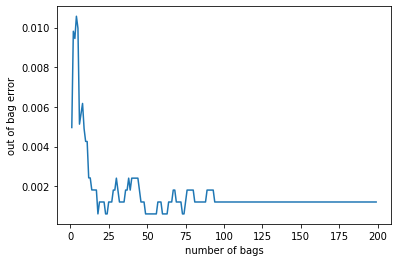

In [ ]:
num_bags = 200
m = 80
random_forest(X_train, y_train, X_test, y_test, num_bags, m)

In [ ]:
# extract 3 and 5
three_vs_five_train = np.r_[train[np.where(train[:, 0] == 3)[0], :], train[np.where(train[:, 0] == 5)[0], :]]
X_train = three_vs_five_train[:, 1:]
y_train = three_vs_five_train[:, 0]

three_vs_five_test = np.r_[test[np.where(test[:, 0] == 3)[0], :], test[np.where(test[:, 0] == 5)[0], :]]
X_test = three_vs_five_test[:, 1:]
y_test = three_vs_five_test[:, 0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in long_scalars


(array([       nan, 0.07093822, 0.0739726 , 0.06637168, 0.07017544,
        0.06537753, 0.06420405, 0.06357388, 0.05902192, 0.0558799 ,
        0.05550953, 0.05528053, 0.05193735, 0.05523495, 0.05436573,
        0.05436573, 0.04942339, 0.04859967, 0.04695222, 0.04118616,
        0.03953871, 0.03459638, 0.0354201 , 0.03212521, 0.02965404,
        0.02800659, 0.02965404, 0.02800659, 0.02800659, 0.02883031,
        0.03047776, 0.02883031, 0.02718287, 0.02800659, 0.02635914,
        0.0247117 , 0.02553542, 0.02553542, 0.02635914, 0.0247117 ,
        0.02718287, 0.02388797, 0.02800659, 0.02718287, 0.02553542,
        0.0247117 , 0.02306425, 0.02635914, 0.02306425, 0.02388797,
        0.02388797, 0.0214168 , 0.01976936, 0.02306425, 0.0214168 ,
        0.02224053, 0.02306425, 0.02388797, 0.02224053, 0.02224053,
        0.02224053, 0.02224053, 0.02224053, 0.02224053, 0.02306425,
        0.02224053, 0.02224053, 0.02059308, 0.0214168 , 0.02059308,
        0.02059308, 0.02059308, 0.02059308, 0.02

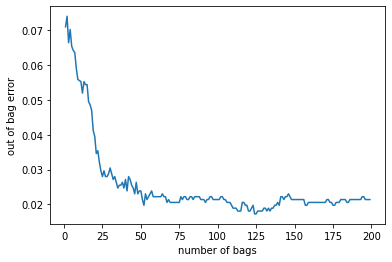

In [ ]:
num_bags = 200
m = 80
random_forest(X_train, y_train, X_test, y_test, num_bags, m)

In [ ]:
a = np.ones((4,4))
a[2,:] = np.nan
a[1, 1:] = np.nan
a

array([[ 1.,  1.,  1.,  1.],
       [ 1., nan, nan, nan],
       [nan, nan, nan, nan],
       [ 1.,  1.,  1.,  1.]])

In [ ]:
y_pred_pre = mode(a, axis=1).mode
index = ~np.isnan(y_pred_pre)
print(index)
y_pred_pre[index]

[[ True]
 [ True]
 [False]
 [ True]]


array([1., 1., 1.])

In [ ]:
np.sum(index)


     t1   t2   t3   t4   t5   t6oob_error
y1   1    nan   3    0   0
y2   nan   1    1    0   0
y3   nan  nan  nan   0   0

3